# Analyse der 60:30:10 Regel

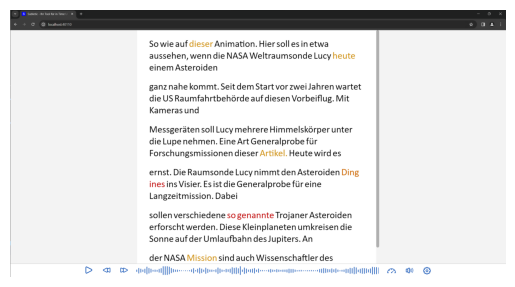

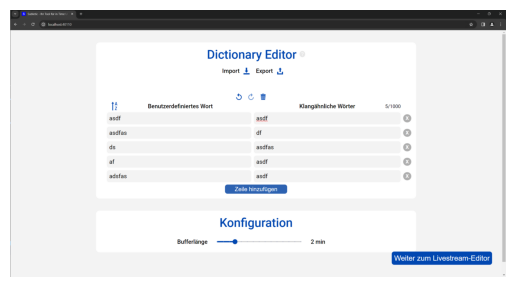

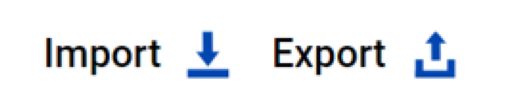

In [51]:
# Import png file and convert to list with color values

mainpage = '../img/Frontend_mainpage.png'
configuration =  '../img/Frontend_configuration.png'
colorTest =  '../img/color_test.png'
colorTest2 =  '../img/color_test_2.png'

from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def drawImage(filepath):
    img = Image.open(filepath)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

drawImage(mainpage)
drawImage(configuration)
drawImage(colorTest)

In [52]:
from PIL import Image
import numpy as np

def bild_zu_np_array(pfad_zum_bild):
    # Bild mit Pillow öffnen
    bild = Image.open(pfad_zum_bild)

    # Bild zu einem NumPy-Array konvertieren
    bild_array = np.array(bild)

    return bild_array

def rgb_array_erstellen(bild_array):
    # Extrahiere die RGB-Kanäle
    r = bild_array[:, :, 0]
    g = bild_array[:, :, 1]
    b = bild_array[:, :, 2]

    # Erstelle ein 3D-Array mit RGB-Tupeln
    rgb_array = np.stack((r, g, b), axis=-1)

    return rgb_array

# Beispielaufruf
bild_array = bild_zu_np_array(colorTest2)
rgb_array = rgb_array_erstellen(bild_array)

# Höhe und Breite des Bildes ermitteln
hoehe, breite, _ = rgb_array.shape

# Das 3D-Array in eine Liste von RGB-Tupeln umwandeln
rgb_array = rgb_array.reshape(hoehe * breite, 3)

print(rgb_array)

# write to file
np.savetxt('color_test_2.csv', rgb_array, delimiter=',', fmt='%d')

[[255 255 255]
 [255 255 255]
 [255 255 255]
 ...
 [255 255 255]
 [255 255 255]
 [255 255 255]]


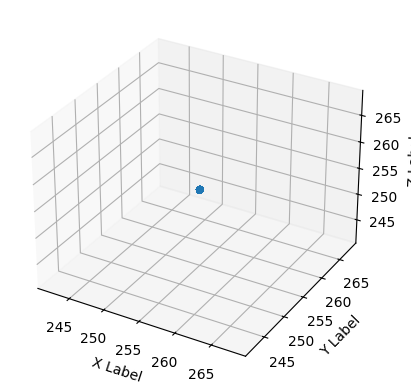

In [70]:
x = []
y = []
z = []

for item in bild_array:
    x.append(item[0])
    y.append(item[1])
    z.append(item[2])

# save x list to txtfile
np.savetxt('x.txt', x, delimiter=',', fmt='%d')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

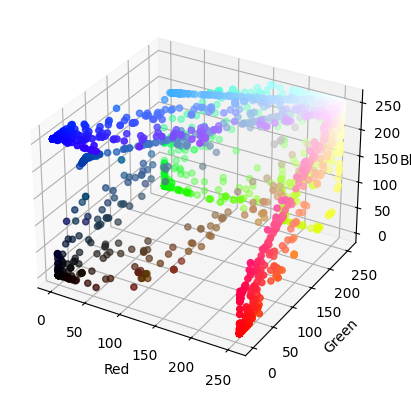

In [54]:
def plot_colors_3d(filename):
    # Bild laden
    img = Image.open(filename)
    # Bild in ein Numpy-Array konvertieren
    img_np = np.array(img)
    # Reshape das Array
    img_reshaped = img_np.reshape(-1, 3)
    # Erstellen Sie den 3D-Plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(img_reshaped[:, 0], img_reshaped[:, 1], img_reshaped[:, 2], c=img_reshaped / 255)
    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    plt.show()

# Farben in einem 3D-Plot anzeigen
plot_colors_3d(colorTest)

In [55]:
def import_png(filename):
    # Bild laden
    img = Image.open(filename)
    # Bild in ein Numpy-Array konvertieren
    img_np = np.array(img)
    # Reshape das Array für die KMeans-Clusterbildung
    img_reshaped = img_np.reshape(-1, 3)
    # KMeans-Objekt erstellen
    kmeans = KMeans(n_clusters=3)
    # KMeans-Clusterbildung
    kmeans.fit(img_reshaped)
    # Die Clusterzentren sind die dominanten Farben
    colors = kmeans.cluster_centers_
    # Rückgabe der Farben
    return colors